IMPORTING DATASET AND LIBRARIES INTO DATAFRAME

In [ ]:
import zipfile
import numpy as np #algebric operations
import pandas as pd #data preparation
import plotly.express as px #data visualization
import matplotlib.pyplot as plt #data visulization
from textblob import TextBlob #sentiment analysis



# Define the file path of the compressed file
compressed_file_path = 'netflix_titles.csv.zip'

# Define the directory where you want to extract the files
extracted_directory = './extracted_files/'

# Open the ZIP file and extract its contents
with zipfile.ZipFile(compressed_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_directory)

# Specify the path to the extracted CSV file
extracted_csv_file_path = extracted_directory + 'netflix_titles.csv'

# Read the CSV file from the extracted directory
df = pd.read_csv(extracted_csv_file_path, encoding='utf-8')

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

TV SHOWS OR MOVIES

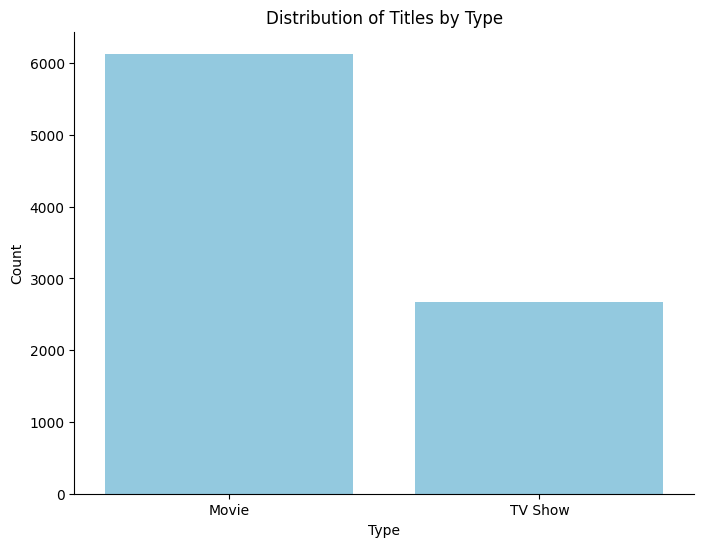

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'type' and calculating the size of each group
type_counts = df['type'].value_counts()

# Creating a vertical bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Titles by Type')
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.show()



RATINGS WHICH HAS MOST CONTENTS

In [ ]:
#1)
# Group the DataFrame 'df' by the 'rating' column and calculate the size of each group (count of occurrences)
x = df.groupby(['rating']).size().reset_index(name='counts')

# Print the DataFrame 'x' to show the distribution of counts for each rating
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


creating pie-chart for data visualization

In [ ]:
#2)
# Create a pie chart using Plotly Express, with count values as 'counts' and rating names as 'rating'
pieChart = px.pie(x, values='counts', names='rating', title='DISTRIBUTION OF CONTENT')

# Display the pie chart
pieChart.show()

THE DIRECTOR APPEARING THE MOST

In [ ]:
#1)
# Fill missing values in the 'director' column with 'Director Not Specified'
df['director'] = df['director'].fillna('Director Not Specified')

# Split director names separated by commas and stack them into a Series
directors_list = df['director'].str.split(',', expand=True).stack()

# Print the resulting Series
print(directors_list)



0     0           Kirsten Johnson
1     0    Director Not Specified
2     0           Julien Leclercq
3     0    Director Not Specified
4     0    Director Not Specified
                    ...          
8802  0             David Fincher
8803  0    Director Not Specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
#3)
# Convert the stacked Series 'directors_list' into a DataFrame with a specified column name
directors_list = directors_list.to_frame(name='Director')

# Rename the column to 'Director'
directors_list.columns = ['Director']

# Print the resulting DataFrame
print(directors_list)

# Group the DataFrame 'directors_list' by the 'Director' column and calculate the size of each group
# Reset the index of the resulting DataFrame and rename the count column to 'Total count'
directors = directors_list.groupby(['Director']).size().reset_index(name='Total count')

# Print the resulting DataFrame with the counts of directors
print(directors)


                      Director
0    0         Kirsten Johnson
1    0  Director Not Specified
2    0         Julien Leclercq
3    0  Director Not Specified
4    0  Director Not Specified
...                        ...
8802 0           David Fincher
8803 0  Director Not Specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]
                       Director  Total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
#3
#removing 'director not specified value'
directors = directors[directors.Director != 'Director Not Specified']
print(directors)

                       Director  Total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
#4)
# Sorting the DataFrame 'directors' in descending order based on the 'Total count' column
# Use the sort_values() method with the 'by' parameter set to the column name and specify 'ascending=False' for descending order
directors = directors.sort_values(by='Total count', ascending=False)

# Print the sorted DataFrame
print(directors)

             Director  Total count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [ ]:
#5)
#top 5 directors
top5directors= directors.head()
print(top5directors)

           Director  Total count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


creating horizontal bar-chart for data visulaization

In [ ]:
#6)
top5directors = top5directors.sort_values(by= (['Total count'])) #to arrande in descending order
barChart=px.bar(top5directors, x = 'Total count', y ='Director' , title=' TOP 5 DIRECTRS ON NETFLIX')
barChart.show()


ACTOR APPEARING THE MOST

In [ ]:
#1)
# Fill missing values in the 'cast' column with 'Cast Not Specified'
df['cast'] = df['cast'].fillna('Cast Not Specified')

# Create an empty DataFrame to store the split actors' names
cast_df = pd.DataFrame()

# Split the 'cast' column by comma and stack the resulting Series
cast_df = df['cast'].str.split(',', expand=True).stack()

# Convert the stacked Series to a DataFrame and assign column name 'Actor'
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']

# Group the DataFrame 'cast_df' by the 'Actor' column and calculate the size of each group
actors = cast_df.groupby(['Actor']).size().reset_index(name='Total count')

# Remove rows where the actor is 'Cast Not Specified'
actors = actors[actors.Actor != 'Cast Not Specified']

# Sort the DataFrame 'actors' in descending order based on the 'Total count' column
actors = actors.sort_values(by=['Total count'], ascending=False)

# Get the top 5 actors based on the highest total count
top5actors = actors.head()

# Sort the top 5 actors DataFrame again for clarity, though it's not necessary since it's already sorted
top5actors = top5actors.sort_values(by=['Total count'], ascending=False)


horizontal bar chart for top 5 actors on netflix

In [ ]:
#2)
top5actors = top5actors.sort_values(by= (['Total count'])) #to arrande in descending order
barChart=px.bar(top5actors, x = 'Total count', y ='Actor' , title=' TOP 5 ACTORS ON NETFLIX')
barChart.show()


TOP 5 COUNTRIES IN WHICH RELEASES TAKES PLACE

In [ ]:
#1)
df['country'] = df['country'].fillna('Country Not Specified')
country_df = pd.DataFrame()
country_df = df['country'].str.split(',', expand=True).stack()
country_df = country_df.to_frame()
country_df.columns = ['Country']
country = country_df.groupby(['Country']).size().reset_index(name='Total count')
country = country[country.Country != 'Country Not Specified']
country = country.sort_values(by=['Total count'], ascending=False)
top5countries = country.head()
top5countries = top5countries.sort_values(by=['Total count'], ascending=False)

horizontal bar chart for top 5 countries in which releases takes place

In [ ]:
top5countries = top5countries.sort_values(by= (['Total count'])) #to arrande in descending order
barChart=px.bar(top5countries, x = 'Total count', y ='Country' , title=' TOP 5 COUNTRIES ON NETFLIX')
barChart.show()

MOST WATCHED CONTENT AS PER YEAR

In [ ]:
#1)
#Selecting columns 'type' and 'release_year' from the original DataFrame df
df1 = df[['type', 'release_year']]

# Renaming the columns for clarity
df1 = df1.rename(columns={"release_year": "Release Year", "type": "Type"})

# Grouping by 'Release Year' and 'Type', and calculating the size of each group
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total count')

# Print the resulting DataFrame
print(df2)

     Release Year     Type  Total count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


graph to visually represent most releases

In [ ]:
graph = px.line(df2,x = 'Release Year', y = 'Total count', title = "WATCHED CONTENT AS PER YEAR")
graph.show()

SENTIMENT ANALYSIS OF NETFLIX CONTENT

In [ ]:
# Selecting columns 'release_year' and 'description' from the original DataFrame df
df3 = df[['release_year', 'description']]

# Renaming the columns for clarity
df3 = df3.rename(columns={"release_year": "Release Year", "description": "Description"})

# Looping through each row in the DataFrame
for index, row in df3.iterrows():
    d = row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[index, 'Sentiment'] = sent  # Corrected 'row' to 'index'

# Grouping by 'Release Year' and 'Sentiment', and calculating the size of each group
df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total count')

# Filtering data for release years after 2005
df3 = df3[df3['Release Year'] > 2005] # Corrected DataFrame filtering syntax

# Plotting the bar chart
barGraph = px.bar(df3, x='Release Year', y='Total count', color='Sentiment',title='SENTIMENT ANALYSIS OF NETFLIX CONTENT')
barGraph.show()